# **Tutorial sobre Kmeans**

# **Fundamentos de la técnica**

K-Means es un algoritmo de **aprendizaje no supervisado** utilizado para **agrupar datos (clustering)** en función de su similitud.  
Su objetivo es dividir un conjunto de datos en *k grupos* (clusters), de modo que los puntos dentro de un mismo grupo sean lo más parecidos posible entre sí, y diferentes de los puntos de otros grupos.

El algoritmo busca minimizar la distancia entre los puntos de un grupo y el **centroide** de ese grupo.

**Etapas principales:**
1. Seleccionar el número de clusters \( k \).
2. Inicializar aleatoriamente los centroides.
3. Asignar cada punto de datos al centroide más cercano.
4. Recalcular los centroides.
5. Repetir los pasos 3 y 4 hasta que las asignaciones no cambien o se alcance el número máximo de iteraciones.


# **Modelo Matemático**

El objetivo del algoritmo K-Means es minimizar la **suma de los errores cuadráticos (SSE)** entre los puntos de datos y el centroide más cercano.

$$
J = \sum_{i=1}^{k} \sum_{x \in C_i} \| x - \mu_i \|^2
$$

donde:
- $k$: número de clusters.
- $C_i$: conjunto de puntos pertenecientes al cluster *i*.
- $\mu_i$: centroide del cluster *i*.
- $\| x - \mu_i \|^2$: distancia euclidiana cuadrática entre el punto y su centroide.

El algoritmo busca minimizar esta función de costo $J$.

# **Librerías y funciones a emplear en Python**

- **pandas**. Manejo de datos tabulares.
- **numpy**. Operaciones matemáticas y manejo de arreglos.
- **matplotlib.pyplot**. Para la visualización de gráficos.
- **sklearn.cluster.KMeans**. Es la clase principal para implementar el algoritmo K-Means.




In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

### **Funciones principales**

```python
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(X)
kmeans.predict(X)
```
Donde:

*    **n_clusters** representa el número de clusters o grupos.
*    **fit()** entrena el modelo y encuentra los centroides.
*    **predict()** asigna cada punto a un determinado cluster.

# **Pipeline**

# **Preprocesamiento**

En esta etapa se genera y analiza el dataset sintético que será usado para entrenar el modelo K-Means.  
A diferencia de datasets reales, los datos creados con **make_blobs()** no requieren limpieza o tratamiento de valores faltantes, pero sí es útil realizar un **análisis estadístico básico** y visualizar su distribución.

        Feature 1   Feature 2
count  300.000000  300.000000
mean    -1.587895    1.360443
std      4.844461    6.588626
min     -8.609778   -8.491454
25%     -6.433629   -6.482026
50%     -2.533886    1.981159
75%      4.148532    8.511356
max      6.260140   10.918405


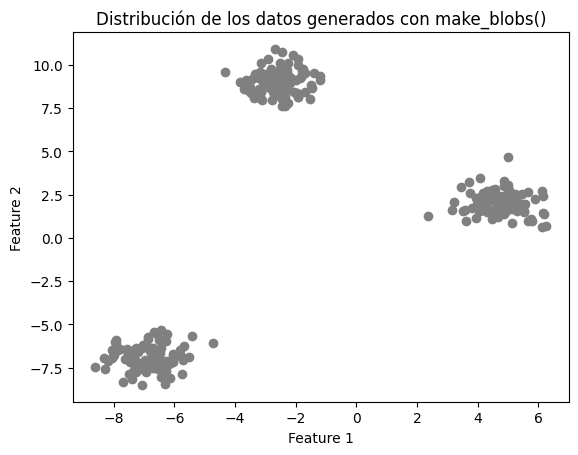

In [19]:
# Cargar dataset de ejemplo
from sklearn.datasets import make_blobs

# Generar dataset sintético
X, y = make_blobs(n_samples=300, centers=3, cluster_std=0.7, random_state=42)

# Convertir a DataFrame para análisis estadístico
df = pd.DataFrame(X, columns=["Feature 1", "Feature 2"])

# Análisis estadístico básico
print(df.describe())

# Gráfico de dispersión para visualizar los datos
plt.scatter(df["Feature 1"], df["Feature 2"], c='gray')
plt.title("Distribución de los datos generados con make_blobs()")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()

# **Feature Engineering**

En este caso, el dataset generado con **make_blobs()** ya produce dos características (Feature 1 y Feature 2) numéricas y escaladas, que representan las variables que se utilizarán para formar los clusters.  

Por lo tanto, no es necesario seleccionar ni transformar características, pero se pueden normalizar si se desea mejorar la convergencia del modelo.

In [20]:
from sklearn.preprocessing import StandardScaler

# Normalización opcional (mejora la estabilidad numérica)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

print("Datos escalados (primeras 5 filas):")
print(X_scaled[:5])

Datos escalados (primeras 5 filas):
[[-1.16063768 -1.34325519]
 [-1.21868455 -1.29373859]
 [-0.07144214  1.03369237]
 [ 1.2561868   0.21008614]
 [-1.38914216 -1.36009549]]


# **Model Training y Prediction**

Una vez entrenado el modelo, se pueden predecir los clusters de nuevos datos usando el método **predict()**.


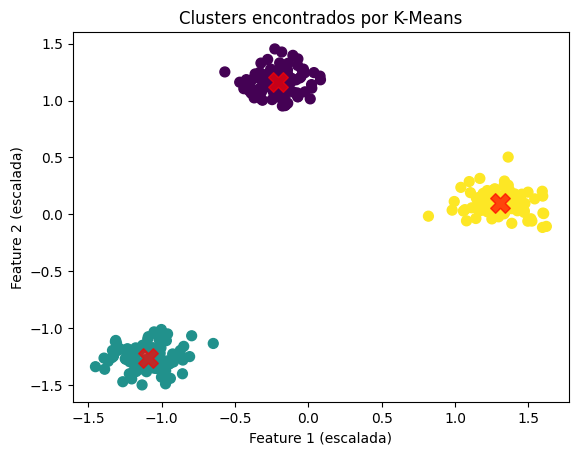

In [21]:
# Aplicar K-Means
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(X_scaled)
y_kmeans = kmeans.predict(X_scaled)

# Visualización de los clusters
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=y_kmeans, cmap='viridis', s=50)
centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='red', s=200, alpha=0.7, marker='X')
plt.title("Clusters encontrados por K-Means")
plt.xlabel("Feature 1 (escalada)")
plt.ylabel("Feature 2 (escalada)")
plt.show()

# **Referencias Bibliográficas**

Joseavinatecmm. (n.d.-a). IDC/distance-based/kmeans.ipynb at main · joseavinatecmm/IDC. GitHub. https://github.com/joseavinatecmm/IDC/blob/main/distance-based/kmeans.ipynb

GeeksforGeeks. (2025a, August 22). K means Clustering – Introduction. GeeksforGeeks. https://www.geeksforgeeks.org/machine-learning/k-means-clustering-introduction/

Kavlakoglu, E., & Winland, V. (2025, October 21). K-Means Clustering. IBM. https://www.ibm.com/think/topics/k-means-clustering
